In [82]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [83]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/archive.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [84]:
#Creating generator
train_ds = keras.utils.image_dataset_from_directory(
    '/content/train',
    labels = 'inferred',
    batch_size = 32,
    image_size = (256,256)
)

val_ds = keras.utils.image_dataset_from_directory(
    '/content/validation',
    labels = 'inferred',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [85]:
#Creating model
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),strides = 2,padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),padding = 'valid'))

model.add(Conv2D(64,kernel_size = (3,3),strides = 2,padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),padding = 'valid'))

model.add(Flatten())

model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation = 'sigmoid'))

In [87]:
model.compile(optimizer = 'Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
es = EarlyStopping(monitor = 'val_accuracy',mode = 'max',verbose = 1,patience = 3)

In [88]:
history = model.fit(train_ds,epochs = 20,validation_data = val_ds)

Epoch 1/20
625/625 [==============================] - 52s 80ms/step - loss: 0.6424 - accuracy: 0.6538 - val_loss: 0.5292 - val_accuracy: 0.7398
Epoch 2/20
625/625 [==============================] - 45s 72ms/step - loss: 0.5245 - accuracy: 0.7390 - val_loss: 0.5366 - val_accuracy: 0.7202
Epoch 3/20
625/625 [==============================] - 47s 75ms/step - loss: 0.4572 - accuracy: 0.7791 - val_loss: 0.4773 - val_accuracy: 0.7732
Epoch 4/20
625/625 [==============================] - 43s 69ms/step - loss: 0.3993 - accuracy: 0.8103 - val_loss: 0.5191 - val_accuracy: 0.7476
Epoch 5/20
625/625 [==============================] - 47s 74ms/step - loss: 0.3491 - accuracy: 0.8343 - val_loss: 0.5024 - val_accuracy: 0.7858
Epoch 6/20
625/625 [==============================] - 47s 75ms/step - loss: 0.2900 - accuracy: 0.8691 - val_loss: 0.6086 - val_accuracy: 0.7780
Epoch 7/20
625/625 [==============================] - 47s 74ms/step - loss: 0.2412 - accuracy: 0.8936 - val_loss: 0.5293 - val_accuracy:

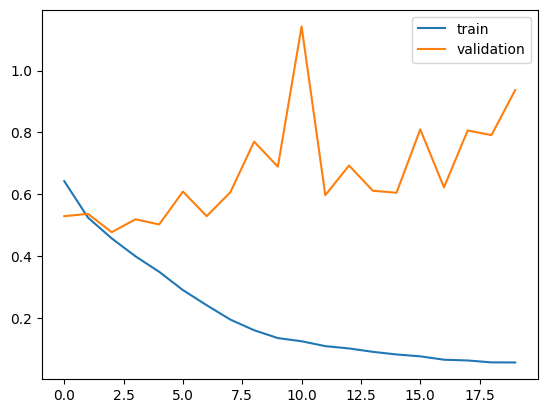

In [89]:
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label = 'validation')
plt.legend()

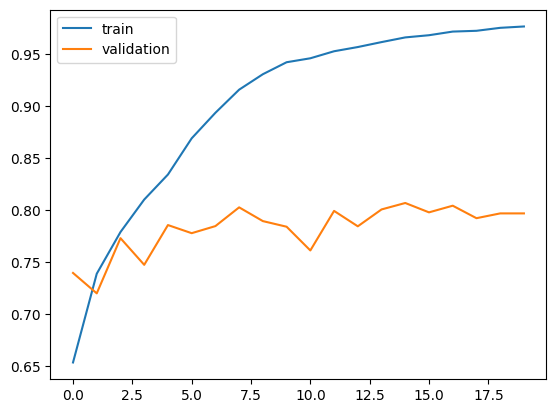

In [90]:
plt.plot(history.history['accuracy'],label = 'train')
plt.plot(history.history['val_accuracy'],label = 'validation')
plt.legend()